In [1]:
# Libraries
import pandas as pd
import numpy as np

# Wrangling
import acquire

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

# Custom Module
import util

from env import get_db_url

In [2]:
df = acquire.get_log_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  900223 non-null  int64  
 1   date        900223 non-null  object 
 2   time        900223 non-null  object 
 3   path        900222 non-null  object 
 4   user_id     900223 non-null  int64  
 5   cohort_id   847330 non-null  float64
 6   ip          900223 non-null  object 
 7   id          847330 non-null  float64
 8   name        847330 non-null  object 
 9   slack       847330 non-null  object 
 10  start_date  847330 non-null  object 
 11  end_date    847330 non-null  object 
 12  created_at  847330 non-null  object 
 13  updated_at  847330 non-null  object 
 14  deleted_at  0 non-null       float64
 15  program_id  847330 non-null  float64
dtypes: float64(4), int64(2), object(10)
memory usage: 109.9+ MB


In [4]:
df

,Unnamed: 0,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2,2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
3,3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
4,4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900218,900218,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2.0
900219,900219,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2.0
900220,900220,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2.0
900221,900221,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2.0


In [5]:
util.metrics(df)

There are 900223 rows and 16 columns in this dataframe.
Plus the following nulls:
Unnamed: 0         0
date               0
time               0
path               1
user_id            0
cohort_id      52893
ip                 0
id             52893
name           52893
slack          52893
start_date     52893
end_date       52893
created_at     52893
updated_at     52893
deleted_at    900223
program_id     52893
dtype: int64
Unnamed: 0      int64
date           object
time           object
path           object
user_id         int64
cohort_id     float64
ip             object
id            float64
name           object
slack          object
start_date     object
end_date       object
created_at     object
updated_at     object
deleted_at    float64
program_id    float64
dtype: object


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,900223.0,450111.000000,259872.140027,0.0,225055.5,450111.0,675166.5,900222.0
user_id,900223.0,458.825707,249.296767,1.0,269.0,475.0,660.0,981.0
cohort_id,847330.0,48.501049,32.795482,1.0,28.0,33.0,57.0,139.0
id,847330.0,48.501049,32.795482,1.0,28.0,33.0,57.0,139.0
deleted_at,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program_id,847330.0,2.086004,0.388231,1.0,2.0,2.0,2.0,4.0


In [6]:
counts = util.get_numbers(df)

Unnamed: 0
0         1
600153    1
600142    1
600143    1
600144    1
         ..
300078    1
300079    1
300080    1
300081    1
900222    1
Name: Unnamed: 0, Length: 900223, dtype: int64
-----------------
date
2021-03-19    3104
2021-04-12    2446
2021-03-25    2369
2020-09-08    2304
2021-03-16    2298
              ... 
2018-12-29      32
2018-12-22      30
2018-12-30      21
2019-07-04      16
2018-12-23      10
Name: date, Length: 1182, dtype: int64
-----------------
time
09:03:00    81
09:01:59    79
09:02:45    75
09:02:16    75
09:05:45    74
            ..
04:58:23     1
04:58:29     1
04:58:30     1
04:58:31     1
07:28:59     1
Name: time, Length: 73167, dtype: int64
-----------------
path
/                                                               50313
search/search_index.json                                        19519
javascript-i                                                    18983
toc                                                             18297
java-iii

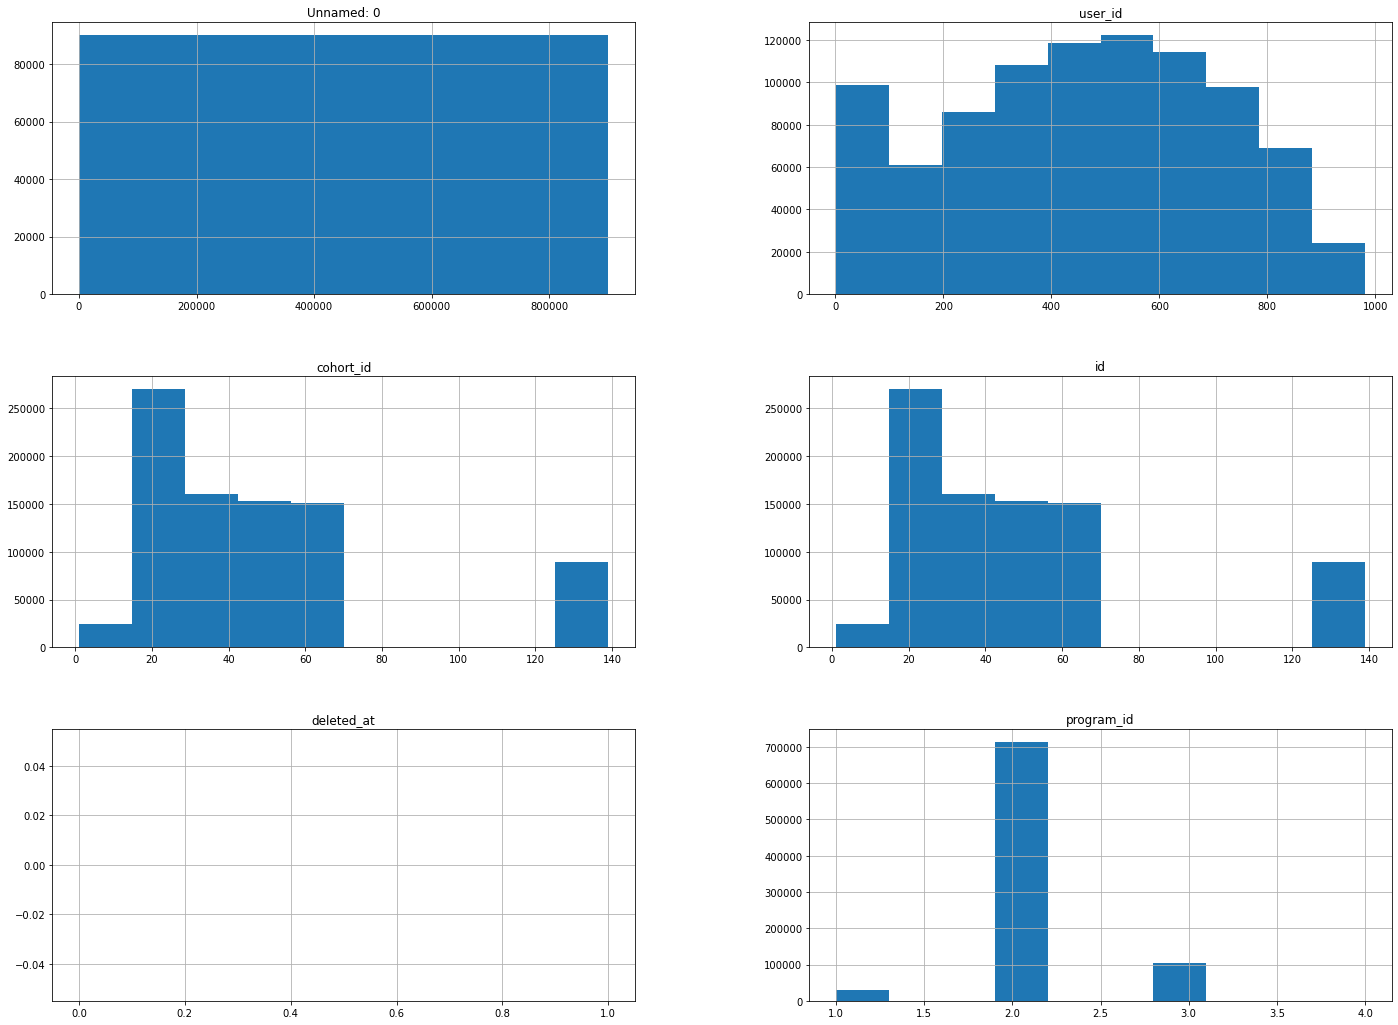

In [7]:
# Shows histograms for numerical columns in df
df.hist(figsize=(24, 18))
plt.show()

In [8]:
ds_names = ['Ada', 'Bayes', 'Curie', 'Darden', 'Easley', 'Florence', '']

In [9]:
ds_alumni = df.loc[df['name'].isin(ds_names)]

In [10]:
ds_alumni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103412 entries, 326053 to 900202
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  103412 non-null  int64  
 1   date        103412 non-null  object 
 2   time        103412 non-null  object 
 3   path        103411 non-null  object 
 4   user_id     103412 non-null  int64  
 5   cohort_id   103412 non-null  float64
 6   ip          103412 non-null  object 
 7   id          103412 non-null  float64
 8   name        103412 non-null  object 
 9   slack       103412 non-null  object 
 10  start_date  103412 non-null  object 
 11  end_date    103412 non-null  object 
 12  created_at  103412 non-null  object 
 13  updated_at  103412 non-null  object 
 14  deleted_at  0 non-null       float64
 15  program_id  103412 non-null  float64
dtypes: float64(4), int64(2), object(10)
memory usage: 13.4+ MB


In [11]:
# convert date, time, start_date, end_date, created_at, and	updated_at, to datetime dtype
# convert all ids to objects since they're used as ids not computational numbers
# drop 'cohort_id' or 'id' since they're the same
# drop 'created_at' or 'update_at' since they're the same, if needed at all
# drop 'slack', since 'name' has basically the same info plus more
# drop deleted_at since it's nulls
# can set a multi-index using 'date' and 'time' as the timestamp
# figure out how to sus out the ds students from the 52893 entries with some column nulls
# at least 103412 ds cohort entries
# 1 value in path is a null